# 获取RTC文件的东、西部位置的流量，用于说明只靠GR的弹性下降问题

干管节点：WS02006249、WS02006234、WS02006228

## 西部节点：HS02004852、WS02006284、HS02004777
## 东部节点：YS02001633、YS02001757、YS02001907、YS02001790

In [7]:
import pyswmm
import numpy as np
import pandas as pd
from swmm_api import read_out_file
from swmm_api import output_file
import matplotlib.pyplot as plt

# 东西部各自有节点，干管有节点，东西部各个LID存水
## 对比GR、GR——RTC东西部节点的流量

In [19]:
outs={}
RSHrains=[str(i) for i in range(6)]
RRrains=[str(i) for i in range(4)]
rains={}
file=['Do-nothing-HC','GR-HC','GR-DDQN','GR-PPO']

for f in file:
    tem={}
    if f == 'Do-nothing-HC':
        for i in RSHrains:
            #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
            out = read_out_file('./Step3_1_S1-S8/S56_HC/Results/RSH/chaohu_rain_'+i+'.out')
            tem[i]=out
    elif f == 'GR-HC':
        for i in RSHrains:
            #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
            #out = read_out_file('./Step3_1_S1-S8/S78_GRHC/HC/_temtestinp/RSH/chaohu_RTC'+i+'_GI_rain.out')
            out = read_out_file('./Step3_1_S1-S8/S78_GRHC/Results/RSH/chaohu_rain_'+i+'.out')
            tem[i]=out
    elif f == 'GR-DDQN':
        for i in RSHrains:
            #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
            out = read_out_file('./Step4_RTC_DDQN/DDQN/_temtestinp/RSH/chaohu_GI_RTC'+i+'_GI_rain.out')
            tem[i]=out
    elif f == 'GR-PPO':
        for i in RSHrains:
            #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
            out = read_out_file('./Step4_RTC_PPO/PPO/_temtestinp/RSH/chaohu_GI_RTC'+i+'_GI_rain.out')
            tem[i]=out
    outs[f]=tem

# 东边比西边多：0，1，2的前半段
# 西边比东边多：3，4，5的前半段

# 同一个点位，各个控制方法的流量对比

In [ ]:
rain=3

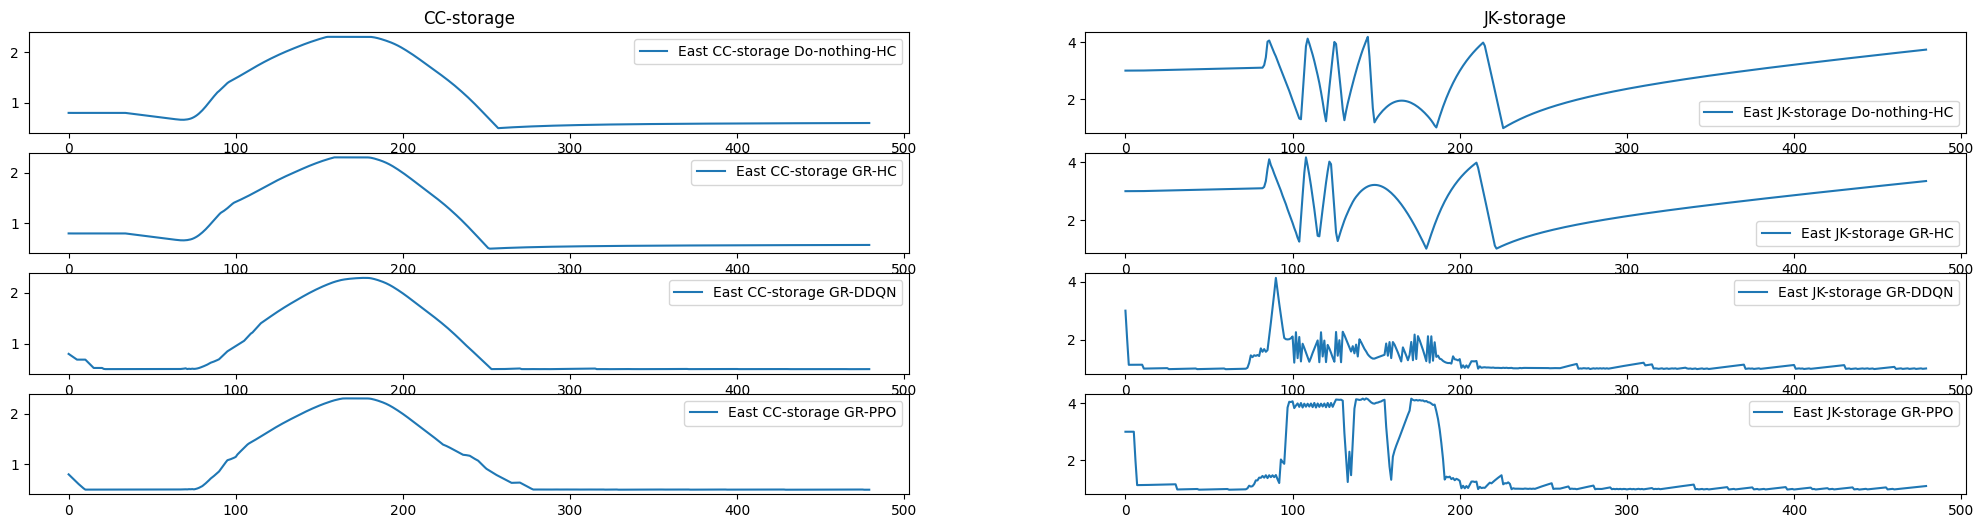

In [35]:
# 东部节点流量情况
nodes=['YS02001757','YS02001793']#links=['YS02001757CaochengTiaoxuchi','YS02001793JiankangQianchi']
nodes=['CC-storage','JK-storage']#links=['YS02001759YS02001757','YS02001907YS02006553']
#nodes=['WS02006251','WS02006235']

links=['WS02006252WS02006251','WS02006256WS02006235']
#rain='0'
fig,ax=plt.subplots(len(file),len(nodes),figsize=(25,6))
m,step=600,1
k=0
j=0
for node in nodes:
    for page in file:
        if k==0:
            ax[k,j].set_title(node)
        ax[k,j].plot(outs[page][rain].get_part('node',node,'depth').values[0:m:step],label='East '+node+' '+page)
    
        ax[k,j].legend()
        k+=1
    j+=1
    k=0


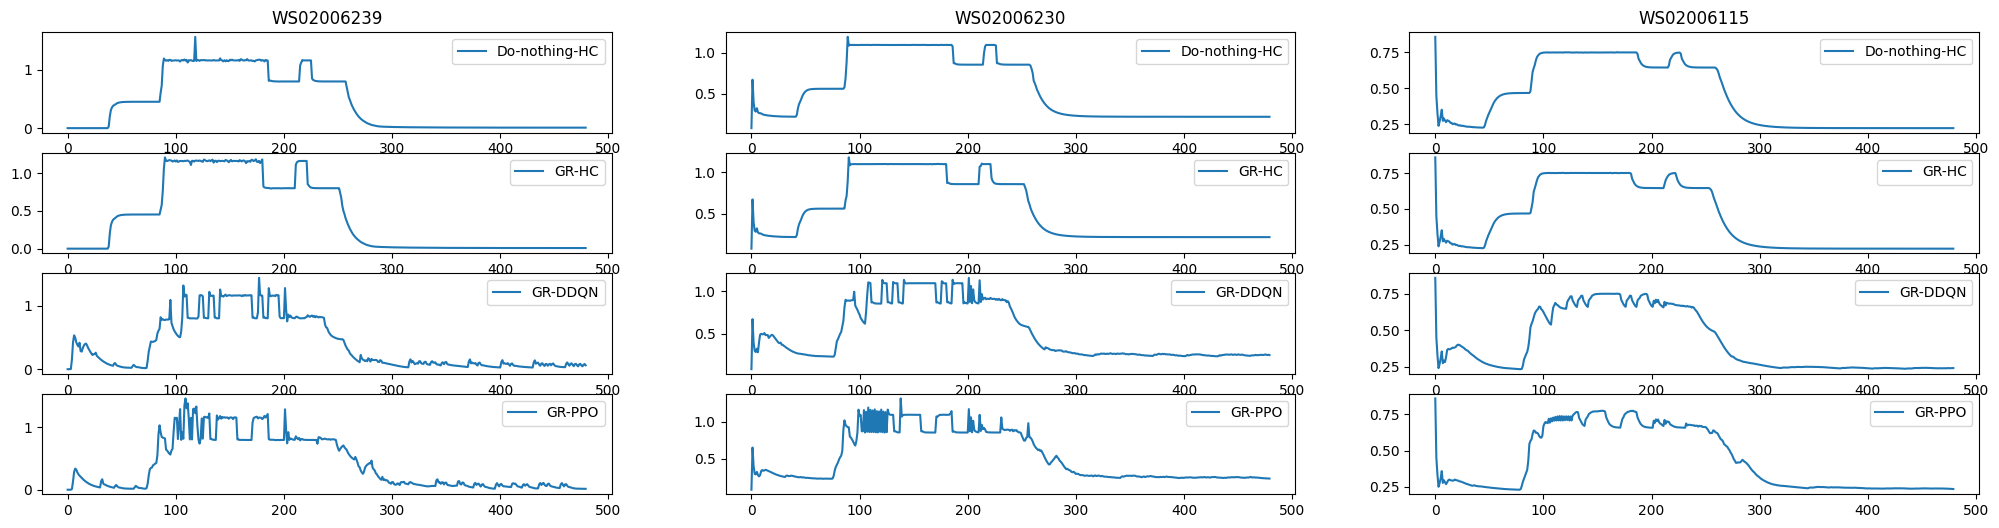

In [34]:
# 干管流量
nodes=['WS02006239','WS02006230','WS02006115']
links=['WS02006240WS02006239','WS02006231WS02006230','WS02006112WS02006115']
#rain='0'
fig,ax=plt.subplots(len(file),len(nodes),figsize=(25,6))
m,step=600,1
k,j=0,0
for node in nodes:
    for page in file:
        if k==0:
            ax[k,j].set_title(node)
        ax[k,j].plot(outs[page][rain].get_part('node',node,'depth').values[0:m:step],label=page)
    
        ax[k,j].legend()
        k+=1
    j+=1
    k=0

# 检查pump

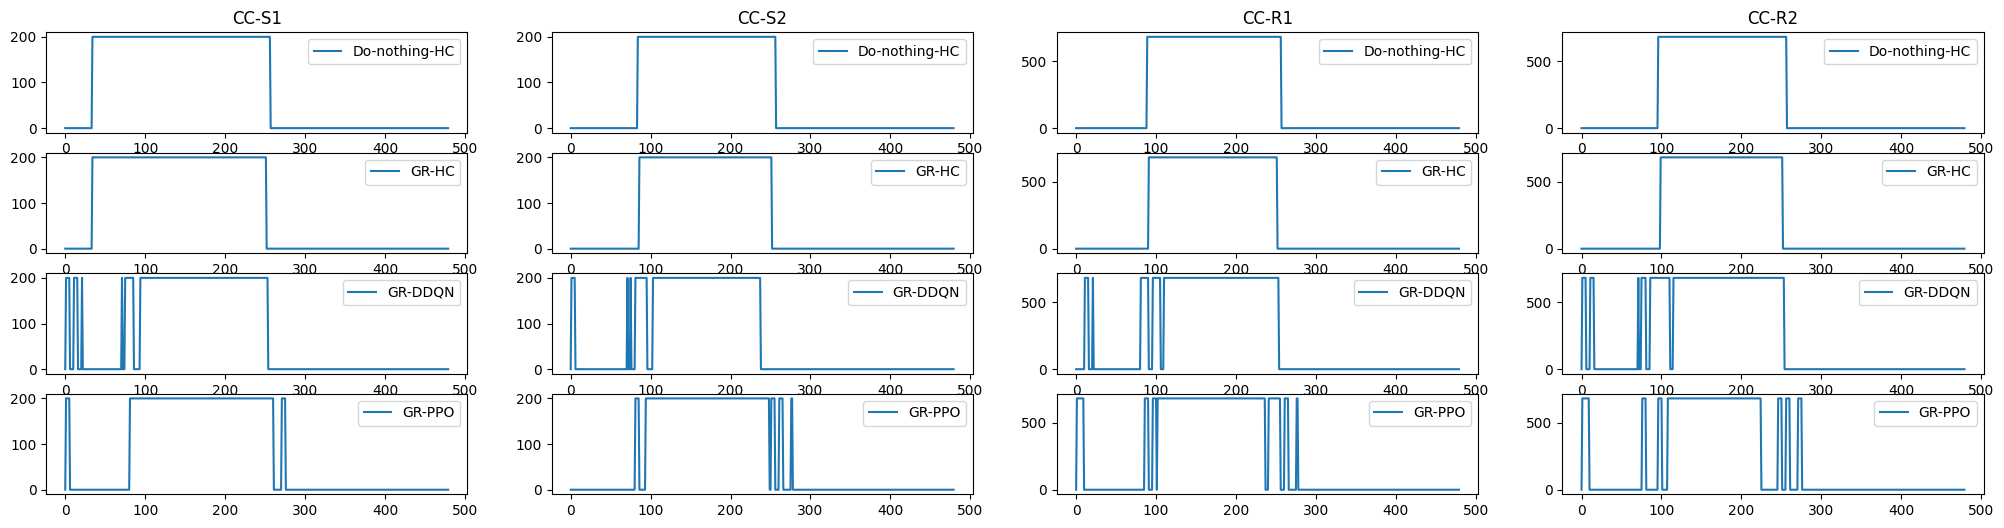

In [32]:
# 干管流量
nodes=['WS02006239','WS02006230','WS02006115']
links=['CC-S1','CC-S2','CC-R1','CC-R2']
rain='5'
fig,ax=plt.subplots(len(file),len(links),figsize=(25,6))
m,step=600,1
k,j=0,0
for node in links:
    for page in file:
        if k==0:
            ax[k,j].set_title(node)
        ax[k,j].plot(outs[page][rain].get_part('link',node,'flow').values[0:m:step],label=page)
    
        ax[k,j].legend()
        k+=1
    j+=1
    k=0

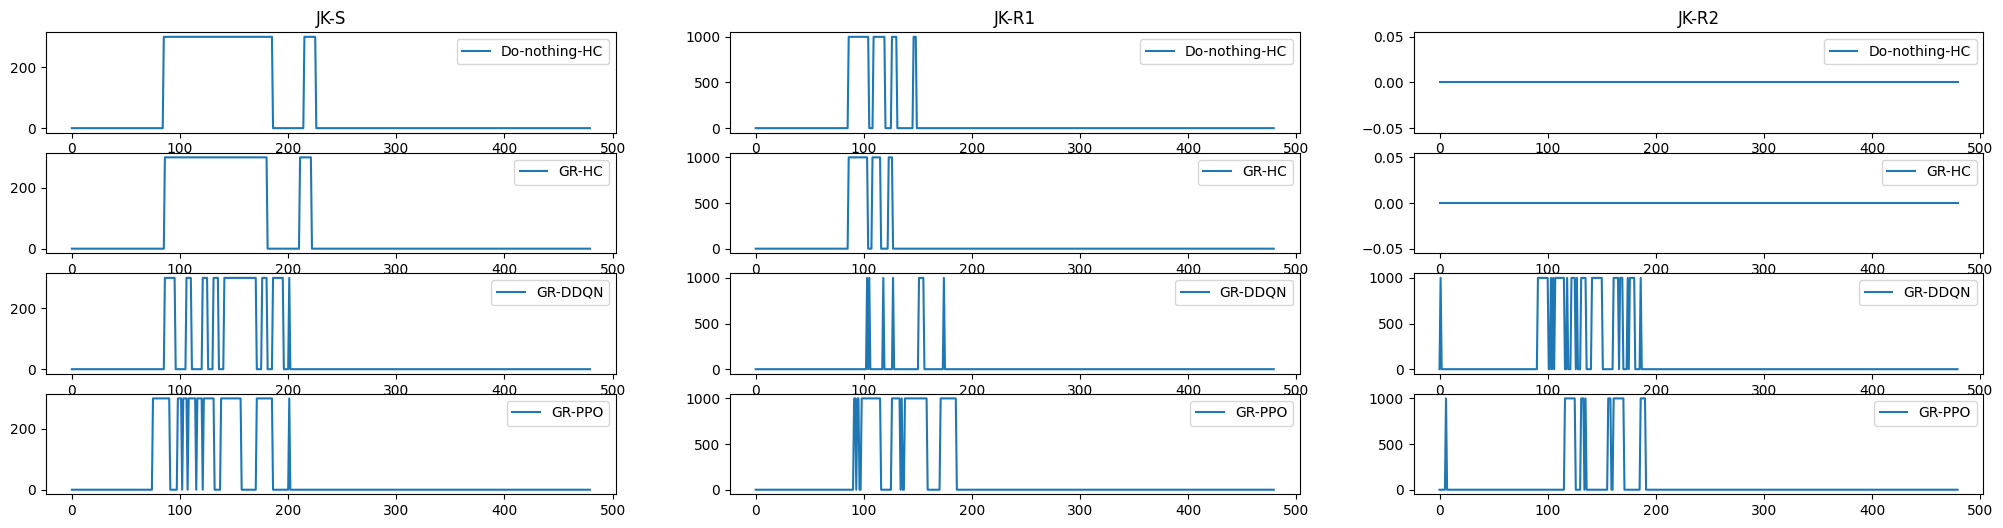

In [33]:
# 干管流量
nodes=['WS02006239','WS02006230','WS02006115']
links=['JK-S','JK-R1','JK-R2']
#rain='0'
fig,ax=plt.subplots(len(file),len(links),figsize=(25,6))
m,step=600,1
k,j=0,0
for node in links:
    for page in file:
        if k==0:
            ax[k,j].set_title(node)
        ax[k,j].plot(outs[page][rain].get_part('link',node,'flow').values[0:m:step],label=page)
    
        ax[k,j].legend()
        k+=1
    j+=1
    k=0

# 获取S1-S8的上述节点流量/水位

In [ ]:
outs={}
file=['S'+str(i) for i in range(1,17)]
RSHrains=[str(i) for i in range(6)]
RRrains=[str(i) for i in range(4)]
rains={}
for f in file:
    if f in ['S'+str(i) for i in [1,3,5,7,9,11,13,15]]:
        rains[f]=RSHrains
    else:
        rains[f]=RRrains

for f in file:
    tem=[]
    for it in rains[f]:
        if f == 'S9':
            for i in RSHrains:
                #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_DDQN_noGI/DDQN/_temtestinp/RSH/chaohu_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S10':
            for i in RRrains:
                #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RR/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_DDQN_noGI/DDQN/_temtestinp/RR/chaohu_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S11':
            for i in RSHrains:
                #tem.append(np.load('./Step4_RTC_PPO/PPO/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_PPO_noGI/PPO/_temtestinp/RSH/chaohu_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S12':
            for i in RRrains:
                #tem.append(np.load('./Step4_RTC_PPO/PPO/Results/RR/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_PPO_noGI/PPO/_temtestinp/RR/chaohu_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S13':
            for i in RSHrains:
                #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_DDQN/DDQN/_temtestinp/RSH/chaohu_GI_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S14':
            for i in RRrains:
                #tem.append(np.load('./Step4_RTC_DDQN/DDQN/Results/RR/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_DDQN/DDQN/_temtestinp/RR/chaohu_GI_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S15':
            for i in RSHrains:
                #tem.append(np.load('./Step4_RTC_PPO/PPO/Results/RSH/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_PPO/PPO/_temtestinp/RSH/chaohu_GI_RTC'+i+'_GI_rain.out')
                tem.append(out)
        elif f == 'S16':
            for i in RRrains:
                #tem.append(np.load('./Step4_RTC_PPO/PPO/Results/RR/'+i+'.npy',allow_pickle=True).tolist())
                out = read_out_file('./Step4_RTC_PPO/PPO/_temtestinp/RR/chaohu_GI_RTC'+i+'_GI_rain.out')
                tem.append(out)
        else:
            out = read_out_file('./Step3_1_S1-S8/'+f+'/Results/chaohu_rain_'+it+'.out')
            tem.append(out)
    outs[f]=tem

In [ ]:
rain=3
fig,ax=plt.subplots(3,8,figsize=(25,6))
mainpip=['WS02006251','WS02006235','WS02006229']
m,step=600,1
its=['S2','S4','S6','S8','S10','S12','S14','S16']
for page in range(8):
    it = its[page]
    ax[0,page].set_title(it)
    ax[0,page].plot(outs[it][rain].get_part('node','HS02004792','depth').values[0:m:step],label='West HS02004792')
    ax[0,page].plot(outs[it][rain].get_part('node','WS02006284','depth').values[0:m:step],label='West WS02006284')
    ax[0,page].plot(outs[it][rain].get_part('node','HS02004777','depth').values[0:m:step],label='West HS02004777')
    ax[1,page].plot(outs[it][rain].get_part('node','YS02001757','depth').values[0:m:step],label='East YS02001757')
    #ax[1,page].plot(outs[it][rain].get_part('node','YS02001633','depth').values[0:m:step],label='East YS02001633')
    #ax[1,page].plot(outs[it][rain].get_part('node','YS02001790','depth').values[0:m:step],label='East YS02001790')
    ax[1,page].plot(outs[it][rain].get_part('node','YS02001907','depth').values[0:m:step],label='East YS02001907')
    
    #ax[2,page].plot(outs[it][rain].get_part('node','WS02006251','depth').values[0:m:step],'r',label='Main WS02006251')
    ax[2,page].plot(outs[it][rain].get_part('node','WS02006235','depth').values[0:m:step],'y',label='Main WS02006235')
    ax[2,page].plot(outs[it][rain].get_part('node','WS02006229','depth').values[0:m:step],'b',label='Main WS02006229')
    if page ==0:
        ax[0,page].legend()
        ax[1,page].legend()
        ax[2,page].legend()


In [ ]:
rain=4
fig,ax=plt.subplots(3,8,figsize=(20,6))
mainpip=['WS02006251','WS02006235','WS02006229']

m,k=200,1
its=['S1','S3','S5','S7','S9','S11','S13','S15']
for page in range(8):
    it=its[page]
    ax[0,page].set_title(it)
    ax[0,page].plot(outs[it][rain].get_part('subcatchment','sub1','runoff').values[0:m:k],label='W sub1')
    ax[0,page].plot(outs[it][rain].get_part('subcatchment','sub8','runoff').values[0:m:k],label='W sub8')
    ax[0,page].plot(outs[it][rain].get_part('subcatchment','sub4','runoff').values[0:m:k],label='W sub4')
    ax[1,page].plot(outs[it][rain].get_part('subcatchment','sub23','runoff').values[0:m:k],label='W sub23')
    ax[1,page].plot(outs[it][rain].get_part('subcatchment','sub22','runoff').values[0:m:k],label='W sub22')
    ax[1,page].plot(outs[it][rain].get_part('subcatchment','sub15','runoff').values[0:m:k],label='W sub15')
    ax[2,page].plot(outs[it][rain].get_part('subcatchment','sub63','runoff').values[0:m:k],label='E sub63')
    ax[2,page].plot(outs[it][rain].get_part('subcatchment','sub66','runoff').values[0:m:k],'r',label='E sub66')
    ax[2,page].plot(outs[it][rain].get_part('subcatchment','sub70','runoff').values[0:m:k],'y',label='E sub70')
    ax[2,page].plot(outs[it][rain].get_part('subcatchment','sub67','runoff').values[0:m:k],'b',label='E sub67')
    ax[0,page].legend()
    ax[1,page].legend()
    ax[2,page].legend()


In [ ]:
rain=2
fig,ax=plt.subplots(4,8,figsize=(25,6))
mainpip=['WS02006251','WS02006235','WS02006229']

m,step=500,1
its=['S2','S4','S6','S8','S10','S12','S14','S16']
for page in range(8):
    it=its[page]
    ax[0,page].set_title(it)
    ax[0,page].plot(outs[it][rain].get_part('link','HS02004792HS02004799','capacity').values[0:m:step],label='West HS02004792')
    ax[0,page].plot(outs[it][rain].get_part('link','WS02006284WS02006280','capacity').values[0:m:step],label='West WS02006284')
    ax[0,page].plot(outs[it][rain].get_part('link','HS02004777HS02004785','capacity').values[0:m:step],label='West HS02004777')
    ax[1,page].plot(outs[it][rain].get_part('link','YS02001757CaochengTiaoxuchi','capacity').values[0:m:step],label='East YS02001757')
    ax[1,page].plot(outs[it][rain].get_part('link','YS02001633YS02163601','capacity').values[0:m:step],label='East YS02001633')
    ax[1,page].plot(outs[it][rain].get_part('link','YS02001790YS02001791','capacity').values[0:m:step],label='East YS02001790')
    ax[1,page].plot(outs[it][rain].get_part('link','YS02001907YS02006553','capacity').values[0:m:step],label='East YS02001907')
    ax[2,page].plot(outs[it][rain].get_part('link','WS02006251WS02006249','capacity').values[0:m:step],'r',label='Main WS02006251')
    ax[2,page].plot(outs[it][rain].get_part('link','WS02006235WS02006234','capacity').values[0:m:step],'y',label='Main WS02006235')
    ax[2,page].plot(outs[it][rain].get_part('link','WS02006229WS02006228','capacity').values[0:m:step],'b',label='Main WS02006229')

    ax[3,page].plot(outs[it][rain].get_part('link','WS02006251WS02006249','capacity').values[0:m:step],label='CC')
    ax[3,page].plot(outs[it][rain].get_part('link','WS02006235WS02006234','capacity').values[0:m:step],label='JK')

    if page==0:
        ax[0,page].legend()
        ax[1,page].legend()
        ax[2,page].legend()
        ax[3,page].legend()


# 按照点位对比

# 干管

In [ ]:
it='capacity'#'flow

def flow_fig_RR(rainid):   
    fig,ax = plt.subplots(3,1,figsize=(10,10),dpi=100)
    ax[0].set_title('WS02006251')
    ax[1].set_title('WS02006235')
    ax[2].set_title('WS02006229')

    for item in ['S'+str(i) for i in [4,6,8,10,12,14,16]]:
        data1=outs[item][rainid].get_part('link','WS02006251WS02006249',it)
        data2=outs[item][rainid].get_part('link','WS02006235WS02006234',it)
        data3=outs[item][rainid].get_part('link','WS02006229WS02006228',it)
        ax[0].plot(data1.values[0:350],label=item)
        ax[1].plot(data2.values[0:350],label=item)
        ax[2].plot(data3.values[0:350],label=item)

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

flow_fig_RR(0)

In [ ]:
item='capacity'#'flow

def flow_fig_RR(rainid):   
    fig,ax = plt.subplots(3,1,figsize=(10,10),dpi=100)
    ax[0].set_title('WS02006251')
    ax[1].set_title('WS02006235')
    ax[2].set_title('WS02006229')

    for item in ['S'+str(i) for i in [2,4,6,8,10,12,14,16]]:
        data1=outs[item][rainid].get_part('link','WS02006251WS02006249',it)
        data2=outs[item][rainid].get_part('link','WS02006235WS02006234',it)
        data3=outs[item][rainid].get_part('link','WS02006229WS02006228',it)
        ax[0].plot(data1.values[0:350],label=item)
        ax[1].plot(data2.values[0:350],label=item)
        ax[2].plot(data3.values[0:350],label=item)

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

flow_fig_RR(3)

In [ ]:
# RSH的所有控制过程数据： S1,3,5,7,9,11

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S3/Results/','./Step3_1_S1-S8/S5/Results/'],
       ['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S5/Results/','./Step4_RTC_PPO_noGI/PPO/Results/RSH/','./Step4_RTC_DDQN_noGI/DDQN/Results/RSH/'],
       ['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S3/Results/','./Step3_1_S1-S8/S7/Results/','./Step4_RTC_PPO/PPO/Results/RSH/','./Step4_RTC_DDQN/DDQN/Results/RSH/']
]
names=[['S1: without GI and RTC','S3: with GI','S5: with HC'],
       ['S1: without GI and RTC','S5: with HC','S9: with PPO','S11: with DDQN'],
       ['S1: without GI and RTC','S3: with GI','S7: with GI and HC','S13: with GI and PPO','S15: with GI and DDQN']
]
names=[['Do nothing','GR','HC'],
         ['Do nothing','HC','DDQN','PPO'],
         ['Do nothing','GR','GR and HC','GR and DDQN','GR and PPO']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['Do nothing','GR','HC'],
         ['Do nothing','HC','DDQN','PPO'],
         ['Do nothing','GR','GR and HC','GR and DDQN','GR and PPO']
]


legends_log={'S1':False,'S3':False,'S5':False,'S7':False,'S9':False,'S11':False,'S13':False,'S15':False}

fig,ax=plt.subplots(6,3,figsize=(25,28))
i,j=0,0
for i in range(6):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['RES'])

            #取时均
            tte=[1 for _ in range(24)]
            for it in range(24,te.shape[0]-10):
                tte.append(np.mean(te[it-10:it+10]))
            te=np.array(tte)
            ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            ax[i][j].legend(fontsize=15)
            #if legends_log[legends[j][s]]:
            #    ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            #else:
            #    ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            #    legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=25)
        ax[i][j].tick_params(axis='x',labelsize=25)
        if j == 1:
            ax[i][j].set_title('The capacity of main pipeline RSH rainfall RSH'+str(i+1),font=font1)
        if i == 5:
            ax[i][j].set_xticks([0,480],[0,480])
        else:
            ax[i][j].set_xticks([])
        ax[i][j].set_yticks([0,1],[0,1])

    #fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==3:
        ax[i][0].set_ylabel('RES',font=font1)

    if i ==5:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Figs/RES_RSH.tif',dpi=100,bbox_inches='tight')

# West支管

In [ ]:
it='capacity'#'flow

def flow_fig_RR(rainid):   
    fig,ax = plt.subplots(4,1,figsize=(10,10),dpi=100)
    ax[0].set_title('WS02006251')
    ax[1].set_title('WS02006235')
    ax[2].set_title('WS02006229')
    ax[3].set_title('HS02004848')

    for item in ['S'+str(i) for i in [2,4,6,8,10,12,14,16]]:
        data1=outs[item][rainid].get_part('link','HS02004792HS02004799',it)
        data2=outs[item][rainid].get_part('link','WS02006284WS02006280',it)
        data3=outs[item][rainid].get_part('link','HS02004777HS02004785',it)
        data4=outs[item][rainid].get_part('link','HS02004848HS02004852',it)
        ax[0].plot(data1.values[0:400],label=item)
        ax[1].plot(data2.values[0:400],label=item)
        ax[2].plot(data3.values[0:400],label=item)
        ax[3].plot(data4.values[0:400],label=item)

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()

flow_fig_RR(2)

# East支管

In [ ]:
it='capacity'#'flow

def flow_fig_RR(rainid):   
    fig,ax = plt.subplots(2,1,figsize=(10,10),dpi=100)
    ax[0].set_title('YS02001757CaochengTiaoxuchi')
    ax[1].set_title('YS02001790YS02001791')

    for item in ['S'+str(i) for i in [2,4,6,8,10,12,14,16]]:
        data1=outs[item][rainid].get_part('link','YS02001757CaochengTiaoxuchi',it)
        data3=outs[item][rainid].get_part('link','YS02001790YS02001791',it)
        ax[0].plot(data1.values[0:400],label=item)
        ax[1].plot(data3.values[0:400],label=item)

    ax[0].legend()
    ax[1].legend()

flow_fig_RR(2)

# 统计所有管网节点的capacity，延时间的积分

In [ ]:
# 分东西统计


In [ ]:
results={}
for rain in range(6):
    print('rain:',rain)
    its=['S1','S3','S5','S7','S9','S11','S13','S15']
    temm=[]
    for it in its:
        datap=outs[it][rain].labels
        tem=[]
        for pipe in datap['link']:
            tem+=outs[it][rain].get_part('link',pipe,'capacity').values[0:480:5].tolist()
        temm.append(np.mean(tem))
    
    results[rain]=temm


In [ ]:
RR=pd.DataFrame(results)
print(RR)